# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

# Step ::1

In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

# LOAD DATA

In [4]:
data = pd.read_csv("CarPrice_Assignment.csv")


In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
print(data.shape)

(205, 26)


In [7]:
print(data.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


# Check missing values::

In [8]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [50]:
data.isnull()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

## convert non-numerical values into numerical values::

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['enginelocation'])

In [12]:
data['doornumber'] = data['doornumber'].map({'two':2,'four':4})

In [13]:
data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int32
aspiration          205 non-null int32
doornumber          205 non-null int64
carbody             205 non-null int32
drivewheel          205 non-null int32
enginelocation      205 non-null int32
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             

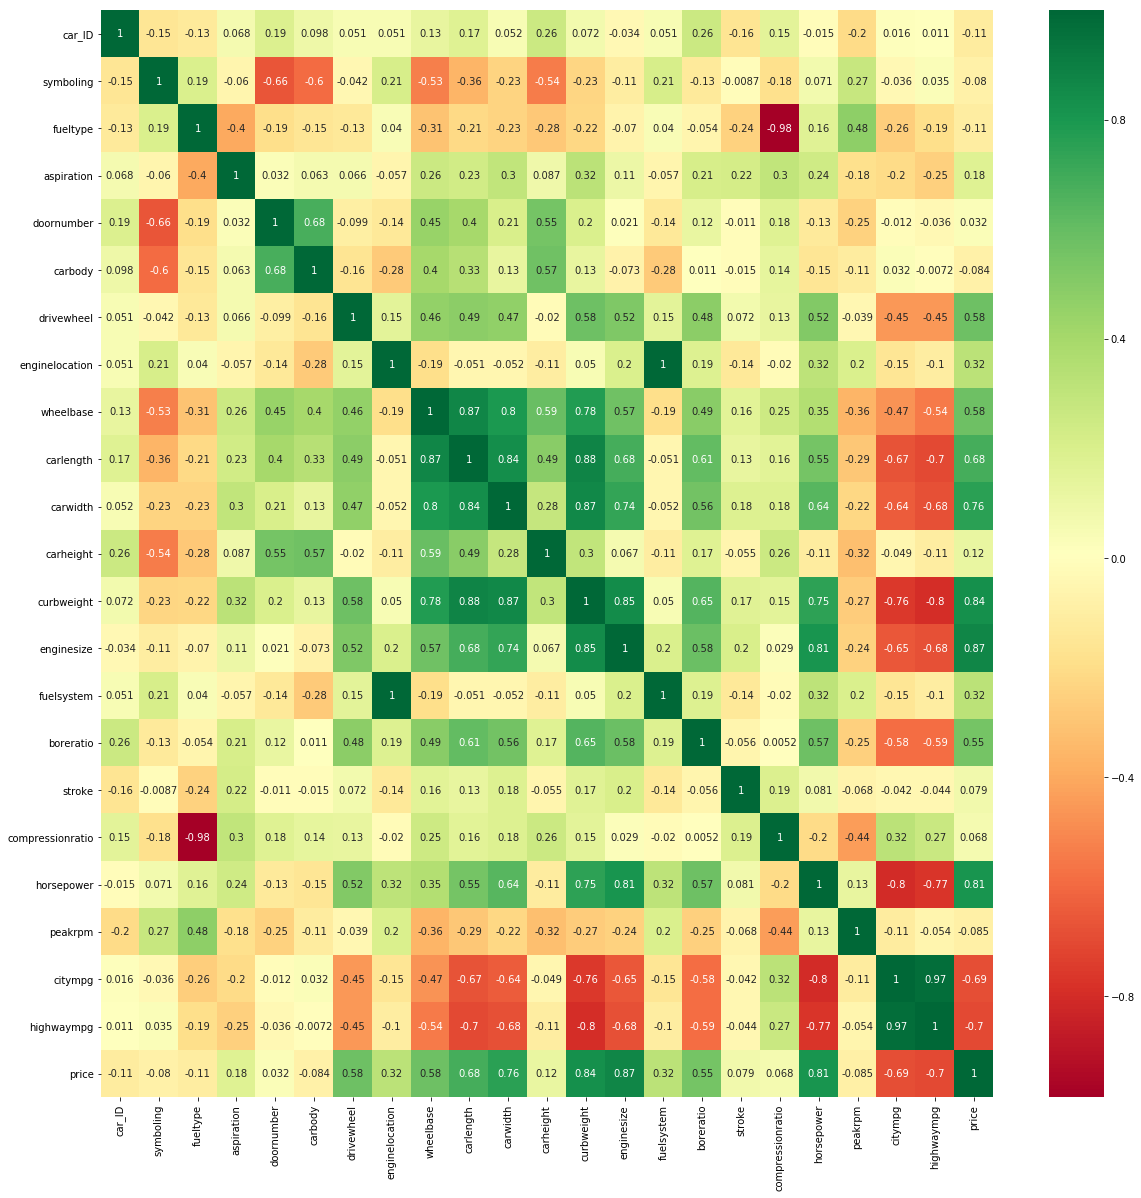

In [18]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
data1 = data[['horsepower','boreratio','enginesize','curbweight','carwidth','carlength',
              'wheelbase','drivewheel','price','enginelocation']]

In [20]:
print(data1.shape)
data1.head()

(205, 10)


,horsepower,boreratio,enginesize,curbweight,carwidth,carlength,wheelbase,drivewheel,price,enginelocation
0,111,3.47,130,2548,64.1,168.8,88.6,2,13495.0,0
1,111,3.47,130,2548,64.1,168.8,88.6,2,16500.0,0
2,154,2.68,152,2823,65.5,171.2,94.5,2,16500.0,0
3,102,3.19,109,2337,66.2,176.6,99.8,1,13950.0,0
4,115,3.19,136,2824,66.4,176.6,99.4,0,17450.0,0


## Split data::

In [21]:
x = (data1.loc[:, data1.columns != 'price'])
y = (data1.loc[:, data1.columns == 'price'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [55]:
y_train.values

array([[11248. ],
       [16503. ],
       [10698. ],
       [ 6855. ],
       [20970. ],
       [ 7295. ],
       [22018. ],
       [10345. ],
       [ 6938. ],
       [18150. ],
       [ 7603. ],
       [ 6095. ],
       [16695. ],
       [ 9538. ],
       [12945. ],
       [12764. ],
       [ 6669. ],
       [ 7957. ],
       [ 7609. ],
       [18620. ],
       [16845. ],
       [18150. ],
       [16500. ],
       [ 6189. ],
       [11048. ],
       [ 7609. ],
       [34028. ],
       [ 6989. ],
       [ 5118. ],
       [ 7295. ],
       [17075. ],
       [10595. ],
       [ 6377. ],
       [15510. ],
       [13845. ],
       [ 6529. ],
       [16925. ],
       [18950. ],
       [ 8058. ],
       [17710. ],
       [ 8558. ],
       [32528. ],
       [15985. ],
       [ 7126. ],
       [17450. ],
       [ 5399. ],
       [12440. ],
       [ 9495. ],
       [16630. ],
       [ 8013. ],
       [16430. ],
       [10245. ],
       [ 5572. ],
       [ 5348. ],
       [11199. ],
       [13

## Create model::

In [42]:
def build_model():
    model = Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu'),input_shape =(9,))

    model.add(tf.keras.layers.Dense(1,))
    
    return model

In [43]:
build_model

<function __main__.build_model()>

In [44]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [47]:
model.fit(x_train, y_train,epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 3ms/step - loss: 62590060.0000 - mae: 4854.8979
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 60240164.0000 - mae: 4702.9048
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 58078548.0000 - mae: 4578.7876
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 55901528.0000 - mae: 4457.0908
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 53710548.0000 - mae: 4351.7134
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 51559616.0000 - mae: 4249.0439
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 49698076.0000 - mae: 4175.5269
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 47885128.0000 - mae: 4107.6050
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 46194264.0000 - mae: 4047.5962
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 44496572.0

5/5 [==============================] - 0s 3ms/step - loss: 31409994.0000 - mae: 4220.4014
Epoch 81/500
5/5 [==============================] - 0s 2ms/step - loss: 31387280.0000 - mae: 4215.1675
Epoch 82/500
5/5 [==============================] - 0s 3ms/step - loss: 31354980.0000 - mae: 4195.0996
Epoch 83/500
5/5 [==============================] - 0s 3ms/step - loss: 31342892.0000 - mae: 4218.0010
Epoch 84/500
5/5 [==============================] - 0s 2ms/step - loss: 31330036.0000 - mae: 4214.7896
Epoch 85/500
5/5 [==============================] - 0s 2ms/step - loss: 31346910.0000 - mae: 4237.6621
Epoch 86/500
5/5 [==============================] - 0s 3ms/step - loss: 31288606.0000 - mae: 4254.5186
Epoch 87/500
5/5 [==============================] - 0s 3ms/step - loss: 31270042.0000 - mae: 4240.8228
Epoch 88/500
5/5 [==============================] - 0s 2ms/step - loss: 31253906.0000 - mae: 4249.4473
Epoch 89/500
5/5 [==============================] - 0s 3ms/step - loss: 31313570.0000 

5/5 [==============================] - 0s 3ms/step - loss: 30094300.0000 - mae: 4134.1025
Epoch 158/500
5/5 [==============================] - 0s 3ms/step - loss: 30017396.0000 - mae: 4149.0728
Epoch 159/500
5/5 [==============================] - 0s 2ms/step - loss: 29983548.0000 - mae: 4132.5527
Epoch 160/500
5/5 [==============================] - 0s 3ms/step - loss: 29952068.0000 - mae: 4117.1270
Epoch 161/500
5/5 [==============================] - 0s 2ms/step - loss: 29947318.0000 - mae: 4125.3110
Epoch 162/500
5/5 [==============================] - 0s 3ms/step - loss: 29991432.0000 - mae: 4088.5188
Epoch 163/500
5/5 [==============================] - 0s 4ms/step - loss: 29937244.0000 - mae: 4111.9702
Epoch 164/500
5/5 [==============================] - 0s 3ms/step - loss: 29916658.0000 - mae: 4148.9253
Epoch 165/500
5/5 [==============================] - 0s 3ms/step - loss: 29846346.0000 - mae: 4144.7920
Epoch 166/500
5/5 [==============================] - 0s 3ms/step - loss: 29853

5/5 [==============================] - 0s 3ms/step - loss: 28543860.0000 - mae: 4039.8159
Epoch 236/500
5/5 [==============================] - 0s 2ms/step - loss: 28447680.0000 - mae: 4042.5962
Epoch 237/500
5/5 [==============================] - 0s 2ms/step - loss: 28443418.0000 - mae: 4041.0315
Epoch 238/500
5/5 [==============================] - 0s 3ms/step - loss: 28415986.0000 - mae: 4014.9258
Epoch 239/500
5/5 [==============================] - 0s 2ms/step - loss: 28474356.0000 - mae: 4061.0862
Epoch 240/500
5/5 [==============================] - 0s 3ms/step - loss: 28428248.0000 - mae: 4031.1870
Epoch 241/500
5/5 [==============================] - 0s 3ms/step - loss: 28402058.0000 - mae: 4046.5249
Epoch 242/500
5/5 [==============================] - 0s 3ms/step - loss: 28345724.0000 - mae: 4021.7981
Epoch 243/500
5/5 [==============================] - 0s 2ms/step - loss: 28342616.0000 - mae: 4006.9109
Epoch 244/500
5/5 [==============================] - 0s 3ms/step - loss: 28383

5/5 [==============================] - 0s 3ms/step - loss: 26914808.0000 - mae: 3905.8037
Epoch 314/500
5/5 [==============================] - 0s 2ms/step - loss: 26837486.0000 - mae: 3889.2429
Epoch 315/500
5/5 [==============================] - 0s 3ms/step - loss: 26806646.0000 - mae: 3892.2710
Epoch 316/500
5/5 [==============================] - 0s 2ms/step - loss: 26802782.0000 - mae: 3884.9846
Epoch 317/500
5/5 [==============================] - 0s 4ms/step - loss: 26789386.0000 - mae: 3905.7849
Epoch 318/500
5/5 [==============================] - 0s 4ms/step - loss: 26728330.0000 - mae: 3905.5117
Epoch 319/500
5/5 [==============================] - 0s 4ms/step - loss: 26760064.0000 - mae: 3907.5027
Epoch 320/500
5/5 [==============================] - 0s 4ms/step - loss: 26706628.0000 - mae: 3899.5532
Epoch 321/500
5/5 [==============================] - 0s 3ms/step - loss: 26710592.0000 - mae: 3886.5615
Epoch 322/500
5/5 [==============================] - 0s 3ms/step - loss: 26622

5/5 [==============================] - 0s 3ms/step - loss: 24873906.0000 - mae: 3819.3340
Epoch 392/500
5/5 [==============================] - 0s 2ms/step - loss: 24878716.0000 - mae: 3789.0991
Epoch 393/500
5/5 [==============================] - 0s 2ms/step - loss: 24839428.0000 - mae: 3754.9656
Epoch 394/500
5/5 [==============================] - 0s 3ms/step - loss: 24774036.0000 - mae: 3763.4011
Epoch 395/500
5/5 [==============================] - 0s 2ms/step - loss: 24735532.0000 - mae: 3739.7927
Epoch 396/500
5/5 [==============================] - 0s 4ms/step - loss: 24758444.0000 - mae: 3771.3357
Epoch 397/500
5/5 [==============================] - 0s 6ms/step - loss: 24687932.0000 - mae: 3758.2886
Epoch 398/500
5/5 [==============================] - 0s 5ms/step - loss: 24658356.0000 - mae: 3723.1133
Epoch 399/500
5/5 [==============================] - 0s 3ms/step - loss: 24642550.0000 - mae: 3762.2378
Epoch 400/500
5/5 [==============================] - 0s 4ms/step - loss: 24589

5/5 [==============================] - 0s 3ms/step - loss: 22568656.0000 - mae: 3621.7886
Epoch 470/500
5/5 [==============================] - 0s 6ms/step - loss: 22587424.0000 - mae: 3603.6035
Epoch 471/500
5/5 [==============================] - 0s 2ms/step - loss: 22591302.0000 - mae: 3608.4214
Epoch 472/500
5/5 [==============================] - 0s 7ms/step - loss: 22480074.0000 - mae: 3619.2761
Epoch 473/500
5/5 [==============================] - 0s 5ms/step - loss: 22446450.0000 - mae: 3597.8308
Epoch 474/500
5/5 [==============================] - 0s 2ms/step - loss: 22428932.0000 - mae: 3585.8530
Epoch 475/500
5/5 [==============================] - 0s 4ms/step - loss: 22425468.0000 - mae: 3557.8525
Epoch 476/500
5/5 [==============================] - 0s 3ms/step - loss: 22377094.0000 - mae: 3574.6965
Epoch 477/500
5/5 [==============================] - 0s 6ms/step - loss: 22369682.0000 - mae: 3536.2717
Epoch 478/500
5/5 [==============================] - 0s 3ms/step - loss: 22391

In [48]:
# predicting the test set results
y_pred = model.predict(x_test)